<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/heatunits%2C%20sowing%20date%20and%20growing%20daya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-57-0887d4a6bbdd>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heat_units_data, x='Yield_Category', y='Cumulative', order=['0-100', '100-200', '200-300', '300-500', '500-700', '700-1000', 'Above 1000'], palette='Set2')
<ipython-input-57-0887d4a6bbdd>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heat_units_data, x='Yield_Category', y='DOS', order=['0-100', '100-200', '200-300', '300-500', '500-700', '700-1000', 'Above 1000'], palette='Set2', ax=ax)


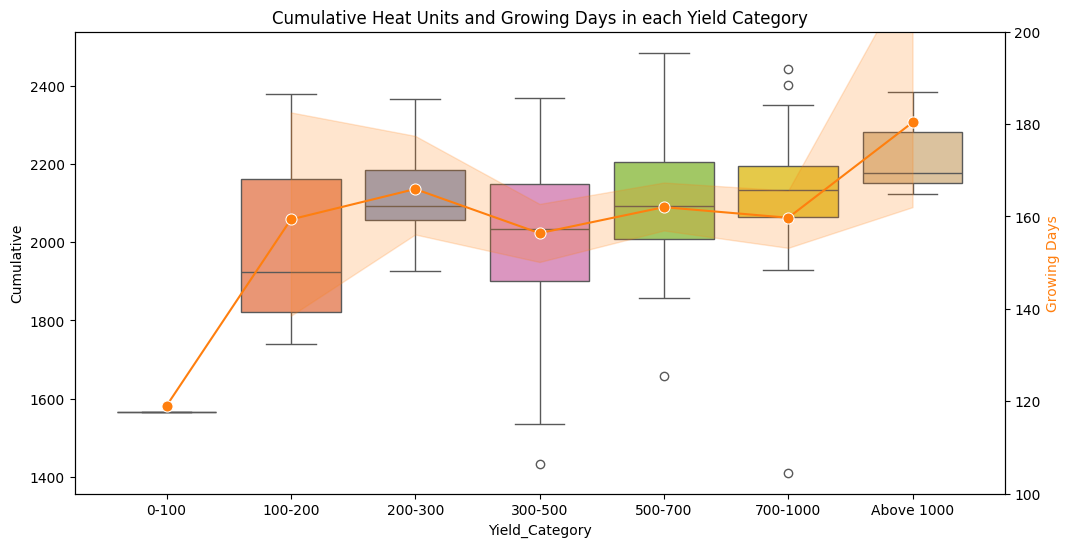

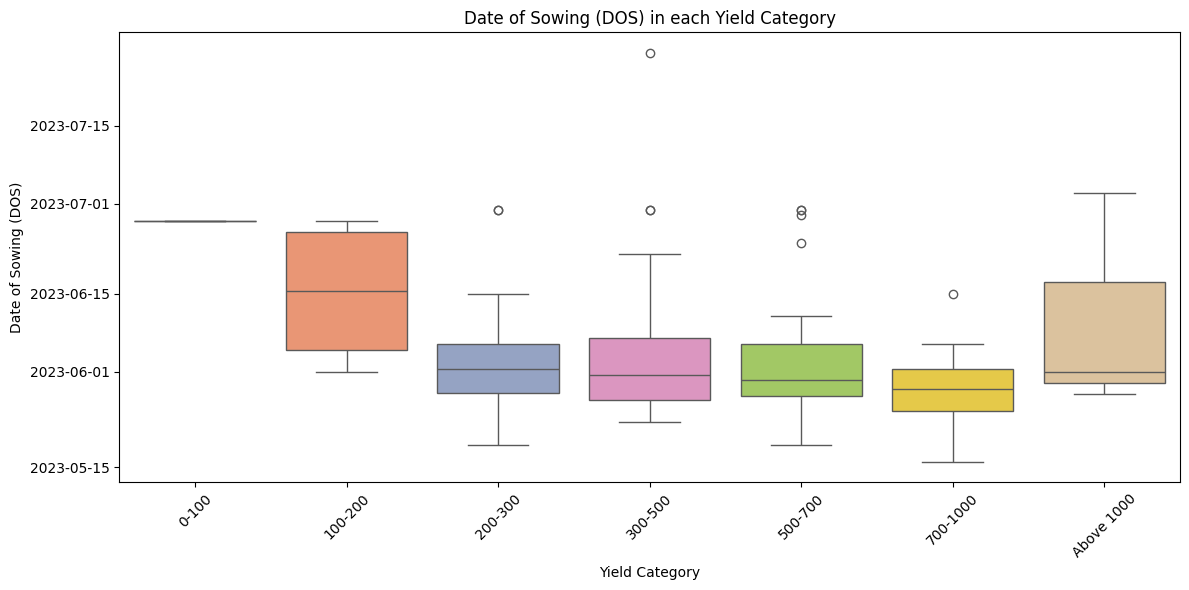

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Authenticate and read data from the URL
import gspread
from google.auth import default

# Authenticate the Google account
from google.colab import auth
auth.authenticate_user()

creds, _ = default()
gc = gspread.authorize(creds)

# Function to load data from Google Sheets
def get_data_from_sheet(url):
    sheet = gc.open_by_url(url).sheet1
    data = sheet.get_all_records()
    df = pd.DataFrame(data)
    return df

# Load the required data from Google Sheets
heat_units_url = 'https://docs.google.com/spreadsheets/d/178pxG7k78BFjucPKfCEWA0ulBZ45vJuyMRLG-MA7KFw/edit?gid=131484811#gid=131484811'
heat_units_data = get_data_from_sheet(heat_units_url)

# Step 2: Strip any extra spaces from column names
heat_units_data.columns = heat_units_data.columns.str.strip()

# Step 3: Categorize the yield based on the provided function
def categorize_yield(row):
    if row > 1000:
        return 'Above 1000'
    elif row <= 100:
        return '0-100'
    elif row <= 200:
        return '100-200'
    elif row <= 300:
        return '200-300'
    elif row <= 500:
        return '300-500'
    elif row <= 700:
        return '500-700'
    elif row <= 1000:
        return '700-1000'

# Apply the categorization function to the 'yield' column
heat_units_data['Yield_Category'] = heat_units_data['yield'].apply(categorize_yield)

# Step 4: Convert 'Date' and 'DOS' to datetime format if not already
heat_units_data['Date'] = pd.to_datetime(heat_units_data['Date'], format='%Y-%m-%d')
heat_units_data['DOS'] = pd.to_datetime(heat_units_data['DOS'], format='%d/%m/%Y')

# Step 5: Plot the first graph - Cumulative Heat Units and Growing Days

# Apply the categorization function to the 'yield' column
heat_units_data['Yield_Category'] = heat_units_data['yield'].apply(categorize_yield)

# Step 4: Convert 'Date' and 'DOS' to datetime format if not already
heat_units_data['Date'] = pd.to_datetime(heat_units_data['Date'], format='%Y-%m-%d')
heat_units_data['DOS'] = pd.to_datetime(heat_units_data['DOS'], format='%d/%m/%Y')

# Step 5: Create the plot - Cumulative Heat Units with Growingdays on the right axis
plt.figure(figsize=(12, 6))

# Left axis: Box plot for Cumulative Heat Units
sns.boxplot(data=heat_units_data, x='Yield_Category', y='Cumulative', order=['0-100', '100-200', '200-300', '300-500', '500-700', '700-1000', 'Above 1000'], palette='Set2')

# Right axis: Line plot for Growingdays
ax2 = plt.gca().twinx()
sns.lineplot(data=heat_units_data, x='Yield_Category', y='Growingdays', marker='o', ax=ax2, color='tab:orange', linestyle='-', markersize=8)

# Set labels and title for the plot
plt.xlabel('Yield Category', color='black')
plt.ylabel('Cumulative Heat Units', color='black')
ax2.set_ylabel('Growing Days', color='tab:orange')

# Set title for the plot
plt.title('Cumulative Heat Units and Growing Days in each Yield Category', color='black')

# Set Y-axis range for the left axis
plt.ylim(1000, 2500)

# Set Y-axis range for the right axis
ax2.set_ylim(100, 200)

# Format the ticks for both axes
plt.xticks(rotation=45)

# Step 6: Plot the second graph - Date of Sowing (DOS)

# Create a figure for Date of Sowing (DOS)
fig, ax = plt.subplots(figsize=(12, 6))

# Box plot for Date of Sowing (DOS)
sns.boxplot(data=heat_units_data, x='Yield_Category', y='DOS', order=['0-100', '100-200', '200-300', '300-500', '500-700', '700-1000', 'Above 1000'], palette='Set2', ax=ax)

# Set labels and title for the plot
ax.set_xlabel('Yield Category', color='black')
ax.set_ylabel('Date of Sowing (DOS)', color='black')

# Set title for the plot
plt.title('Date of Sowing (DOS) in each Yield Category', color='black')

# Format the ticks for the Date of Sowing (DOS)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
